In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
sms=pd.read_csv('spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
sms.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# explore the data

In [5]:
print(" nnumber of rows", len(sms))


 nnumber of rows 5572


In [6]:
sms.label.value_counts()


ham     4825
spam     747
Name: label, dtype: int64

In [7]:
sms.describe()


,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
sms['length'] = sms['text'].apply(lambda x: len(x))
print(sms.head())



  label                                               text  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


# plot the data

<Axes: ylabel='Frequency'>

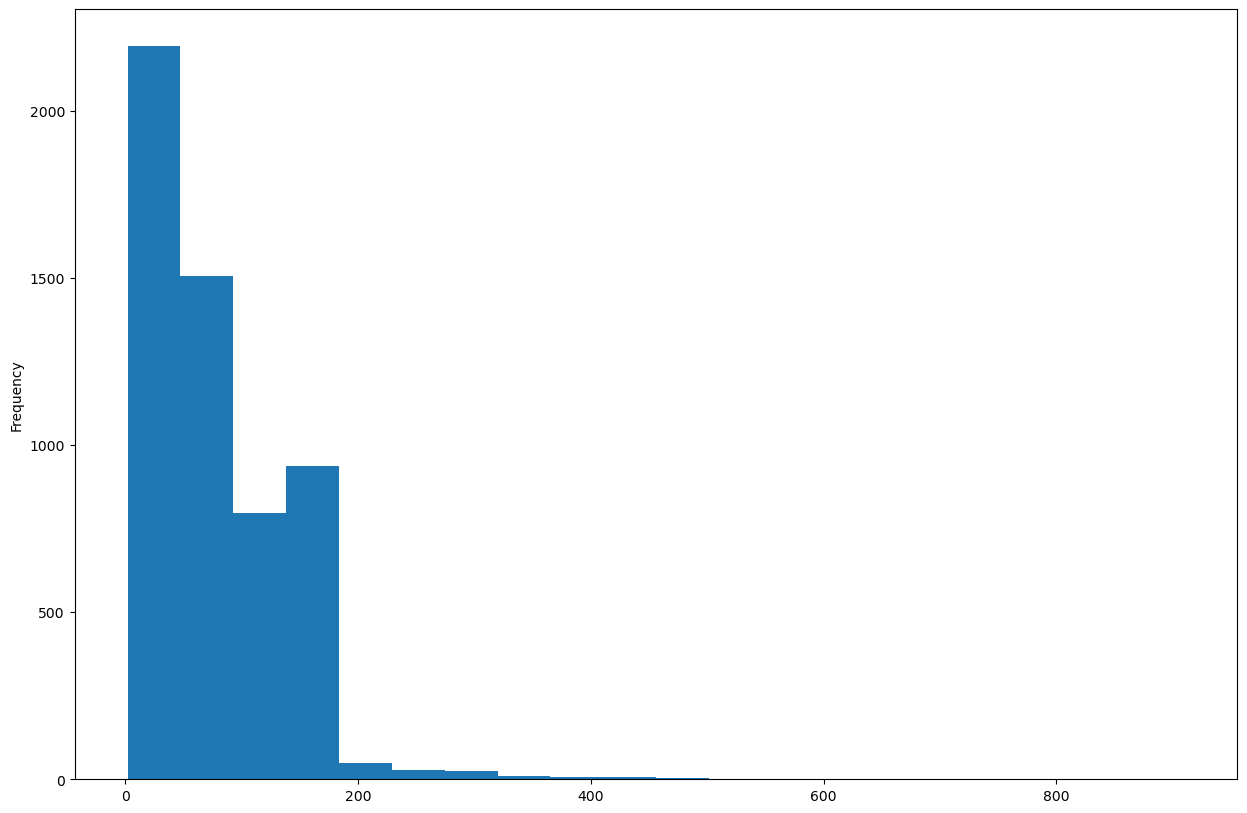

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sms['length'].plot(bins=20, kind='hist',figsize=(15,10))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

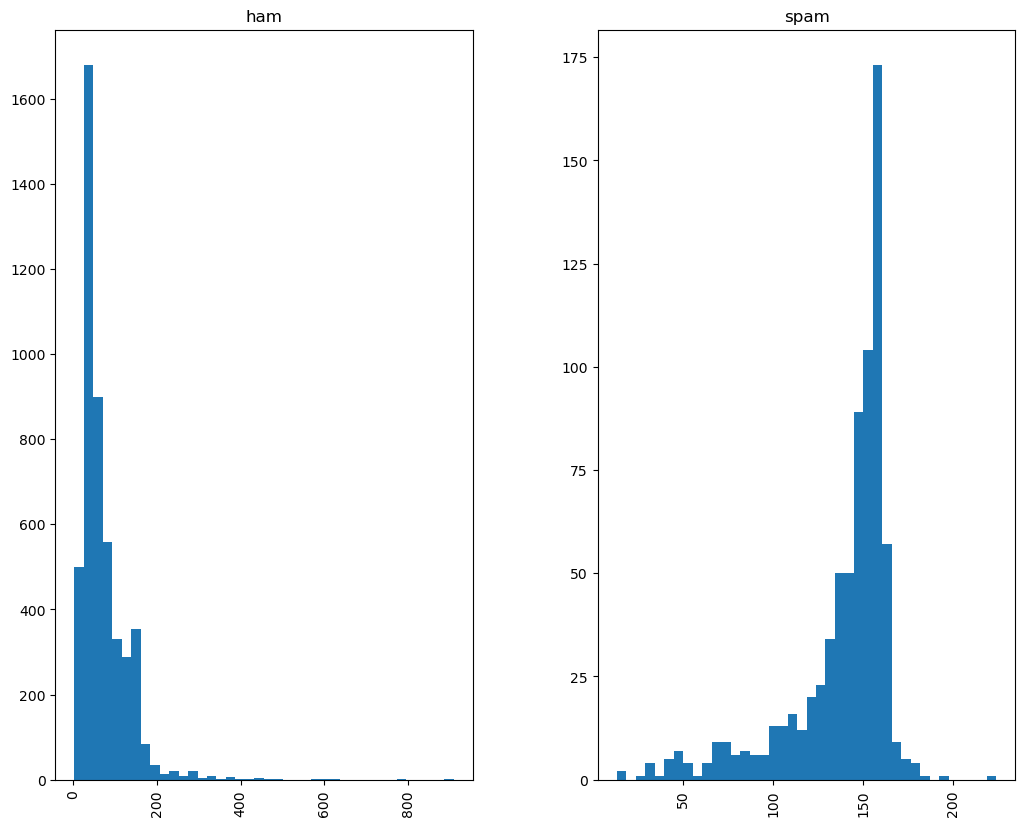

In [10]:
sms.hist(column='length', by='label', bins=40, figsize=(12,10))

In [11]:
sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})
sms.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_6744\1727894437.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})


,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count=CountVectorizer()
input=[]

text=count.fit_transform(sms['text'])

x_train, x_test, y_train, y_test= train_test_split(text, sms['label'], test_size=0.20, random_state=1)
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [14]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


# Modeling

In [15]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [16]:
SpamPrediction=model.predict(x_test)
print(SpamPrediction)

[0 0 0 ... 0 0 0]


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Multinomial NB-")
print("Accuracy score is: {}". format(accuracy_score(y_test, SpamPrediction)) )
print("Precision score is: {}". format(precision_score(y_test, SpamPrediction)) )
print("Recall score is: {}". format(recall_score(y_test, SpamPrediction)))
print("F1 score is: {}". format(f1_score(y_test, SpamPrediction)))

Multinomial NB-
Accuracy score is: 0.9928251121076234
Precision score is: 1.0
Recall score is: 0.9424460431654677
F1 score is: 0.9703703703703704


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Bernoulli NB-")
print("Accuracy score: {}". format(accuracy_score(y_test, SpamPrediction)) )
print("Precision score: {}". format(precision_score(y_test, SpamPrediction)) )
print("Recall score: {}". format(recall_score(y_test, SpamPrediction)))
print("F1 score: {}". format(f1_score(y_test, SpamPrediction)))

Bernoulli NB-
Accuracy score: 0.9928251121076234
Precision score: 1.0
Recall score: 0.9424460431654677
F1 score: 0.9703703703703704


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("MLP Classifier-")
print("Accuracy score: {}". format(accuracy_score(y_test, SpamPrediction)) )
print("Precision score: {}". format(precision_score(y_test, SpamPrediction)) )
print("Recall score: {}". format(recall_score(y_test, SpamPrediction)))
print("F1 score: {}". format(f1_score(y_test, SpamPrediction)))

MLP Classifier-
Accuracy score: 0.9928251121076234
Precision score: 1.0
Recall score: 0.9424460431654677
F1 score: 0.9703703703703704
